# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

import math

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')

df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [9]:
# shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

#info
df.info()

# missing values
df.isnull().sum()

Dataset contains 175777 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13 

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# original: data-types
print(df.dtypes)

# List of categorical features
categorical_features = ['market_id', 'store_primary_category', 'order_protocol']

# Convert to 'category' data type
for feature in categorical_features:
    df[feature] = df[feature].astype('category')
    unique_count = df[feature].nunique()
    print(f"{unique_count} Unique values in {feature} (now as category)")

# updated: data-types
print(df.dtypes)

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object
6 Unique values in market_id (now as category)
73 Unique values in store_primary_category (now as category)
7 Unique values in order_protocol (now as category)
market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_ite

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [18]:
# Calculate time taken in minutes
df['time_taken_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [20]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_placed_hour'] = df['created_at'].dt.hour
df['order_placed_day'] = df['created_at'].dt.dayofweek

df['order_placed_hour'] = df['order_placed_hour'].astype('int64')
df['order_placed_day'] = df['order_placed_day'].astype('int64')

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_placed_day'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('category')

In [21]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [22]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Information about data types and null values
df.info()

Dataset contains 175777 rows and 16 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken_minutes        175777 non-null

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [25]:
# Define target variable (y) and features (X)

# Target
y = df['time_taken_minutes']  

#Features
X = df.drop('time_taken_minutes', axis=1) 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [27]:
# Split data into training and testing sets
# Train : Test - 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [30]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_placed_hour', 'order_placed_day']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


In [31]:
# Basic statistics
df.describe()

total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
std         2.674055    1828.554893            1.625681      519.882924   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
std        560.828571              34.544724           32.168505   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance  time_taken_minutes  \
count             175777.000000  175777.000000       175777.000000   
mean                  58.230115      21.843090           46.203013   
std                   52.731043       8.748712            9.327424   
min                   -6.000000       0.000000           32.000000   
25%                   17.000000      15.360000           39.000000   
50%                   41.000000      21.760000           45.000000   
75%                   85.000000      28.120000           52.000000   
max                  285.000000      83.520000          110.000000   

       order_placed_hour  order_placed_day  
count      175777.000000     175777.000000  
mean            8.473441          3.222293  
std             8.676809          2.043874  
min             0.000000          0.000000  
25%             2.000000          1.000000  
50%             3.000000          3.000000  
75%            19.000000          5.000000  
max            23.000000          6.000000

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

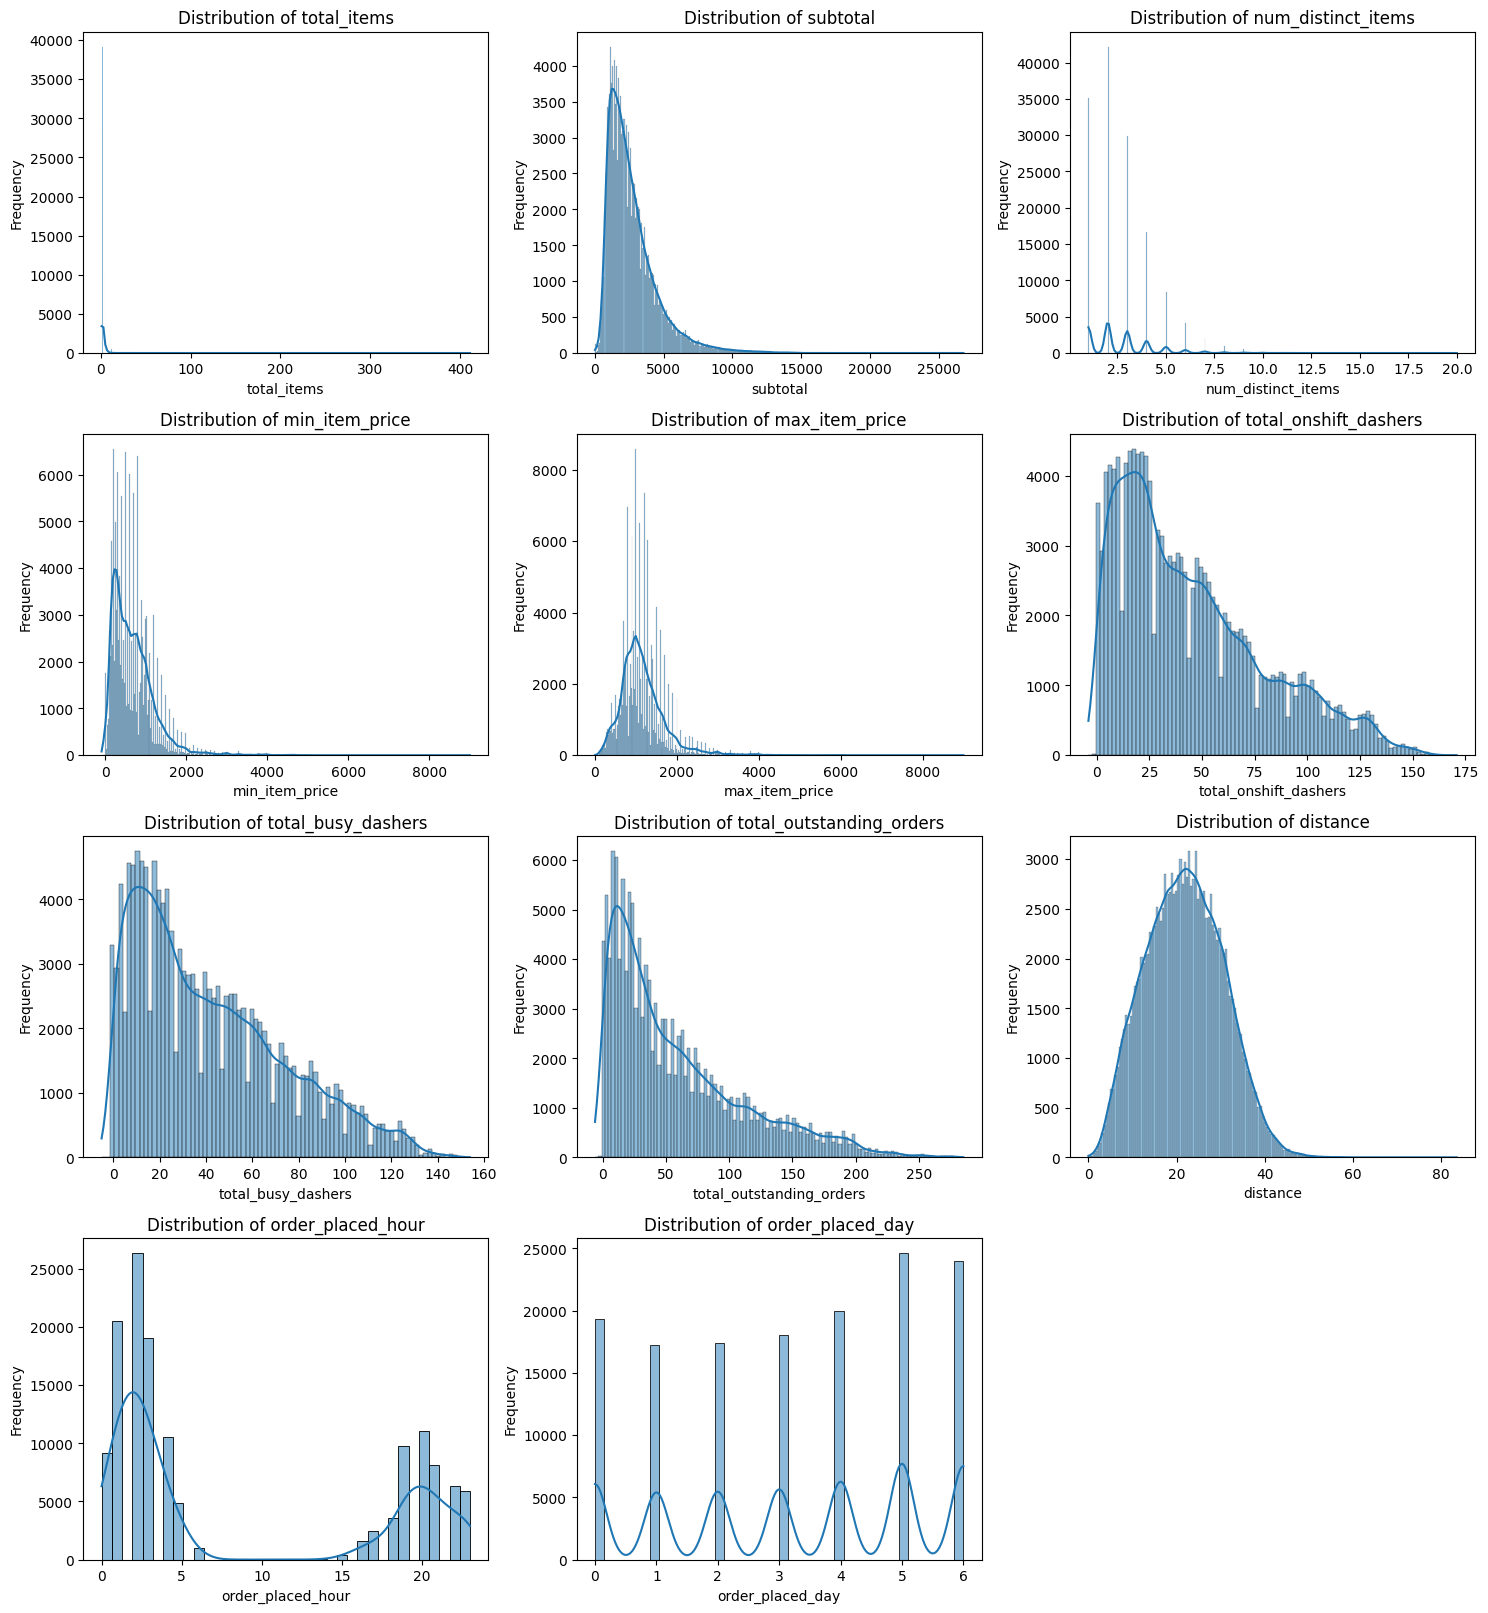

In [33]:
# Plot distributions for all numerical columns

num_cols = len(numerical_cols)

n_cols = 3
n_rows = (num_cols + n_cols - 1) 

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

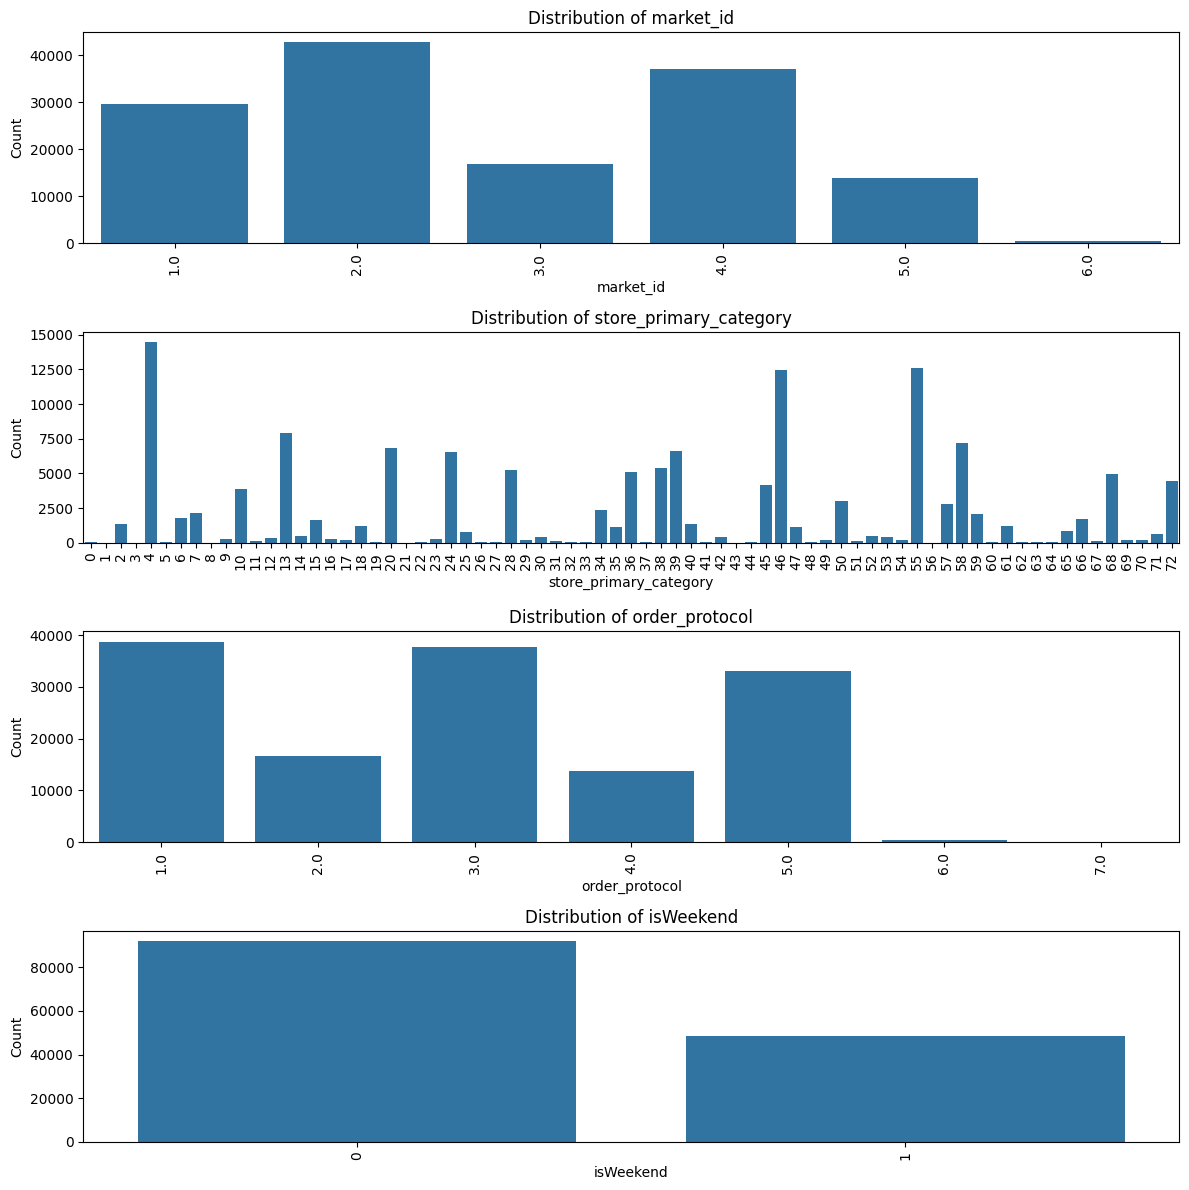

In [35]:
# Distribution of categorical columns

num_cols = len(categorical_cols)

n_cols = 1
n_rows = (num_cols + n_cols - 1) 

plt.figure(figsize=(12 * n_cols, 3 * n_rows))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=X_train[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

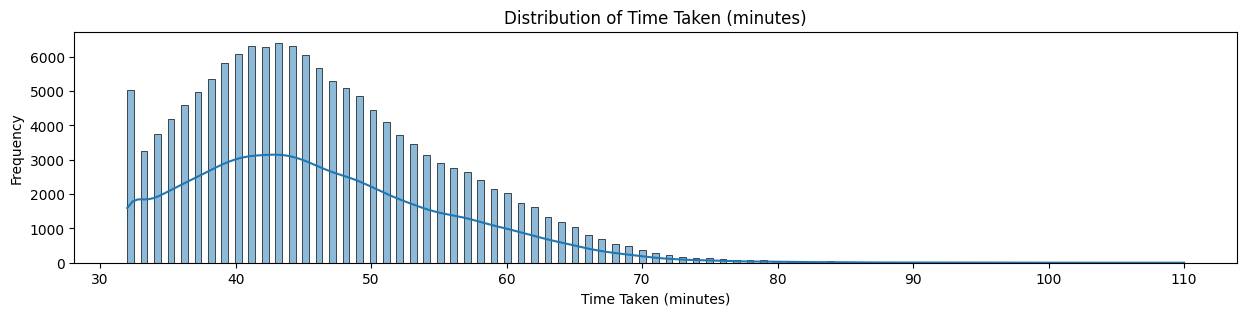

In [37]:
# Distribution of time_taken

plt.figure(figsize=(15,3))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken (minutes)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

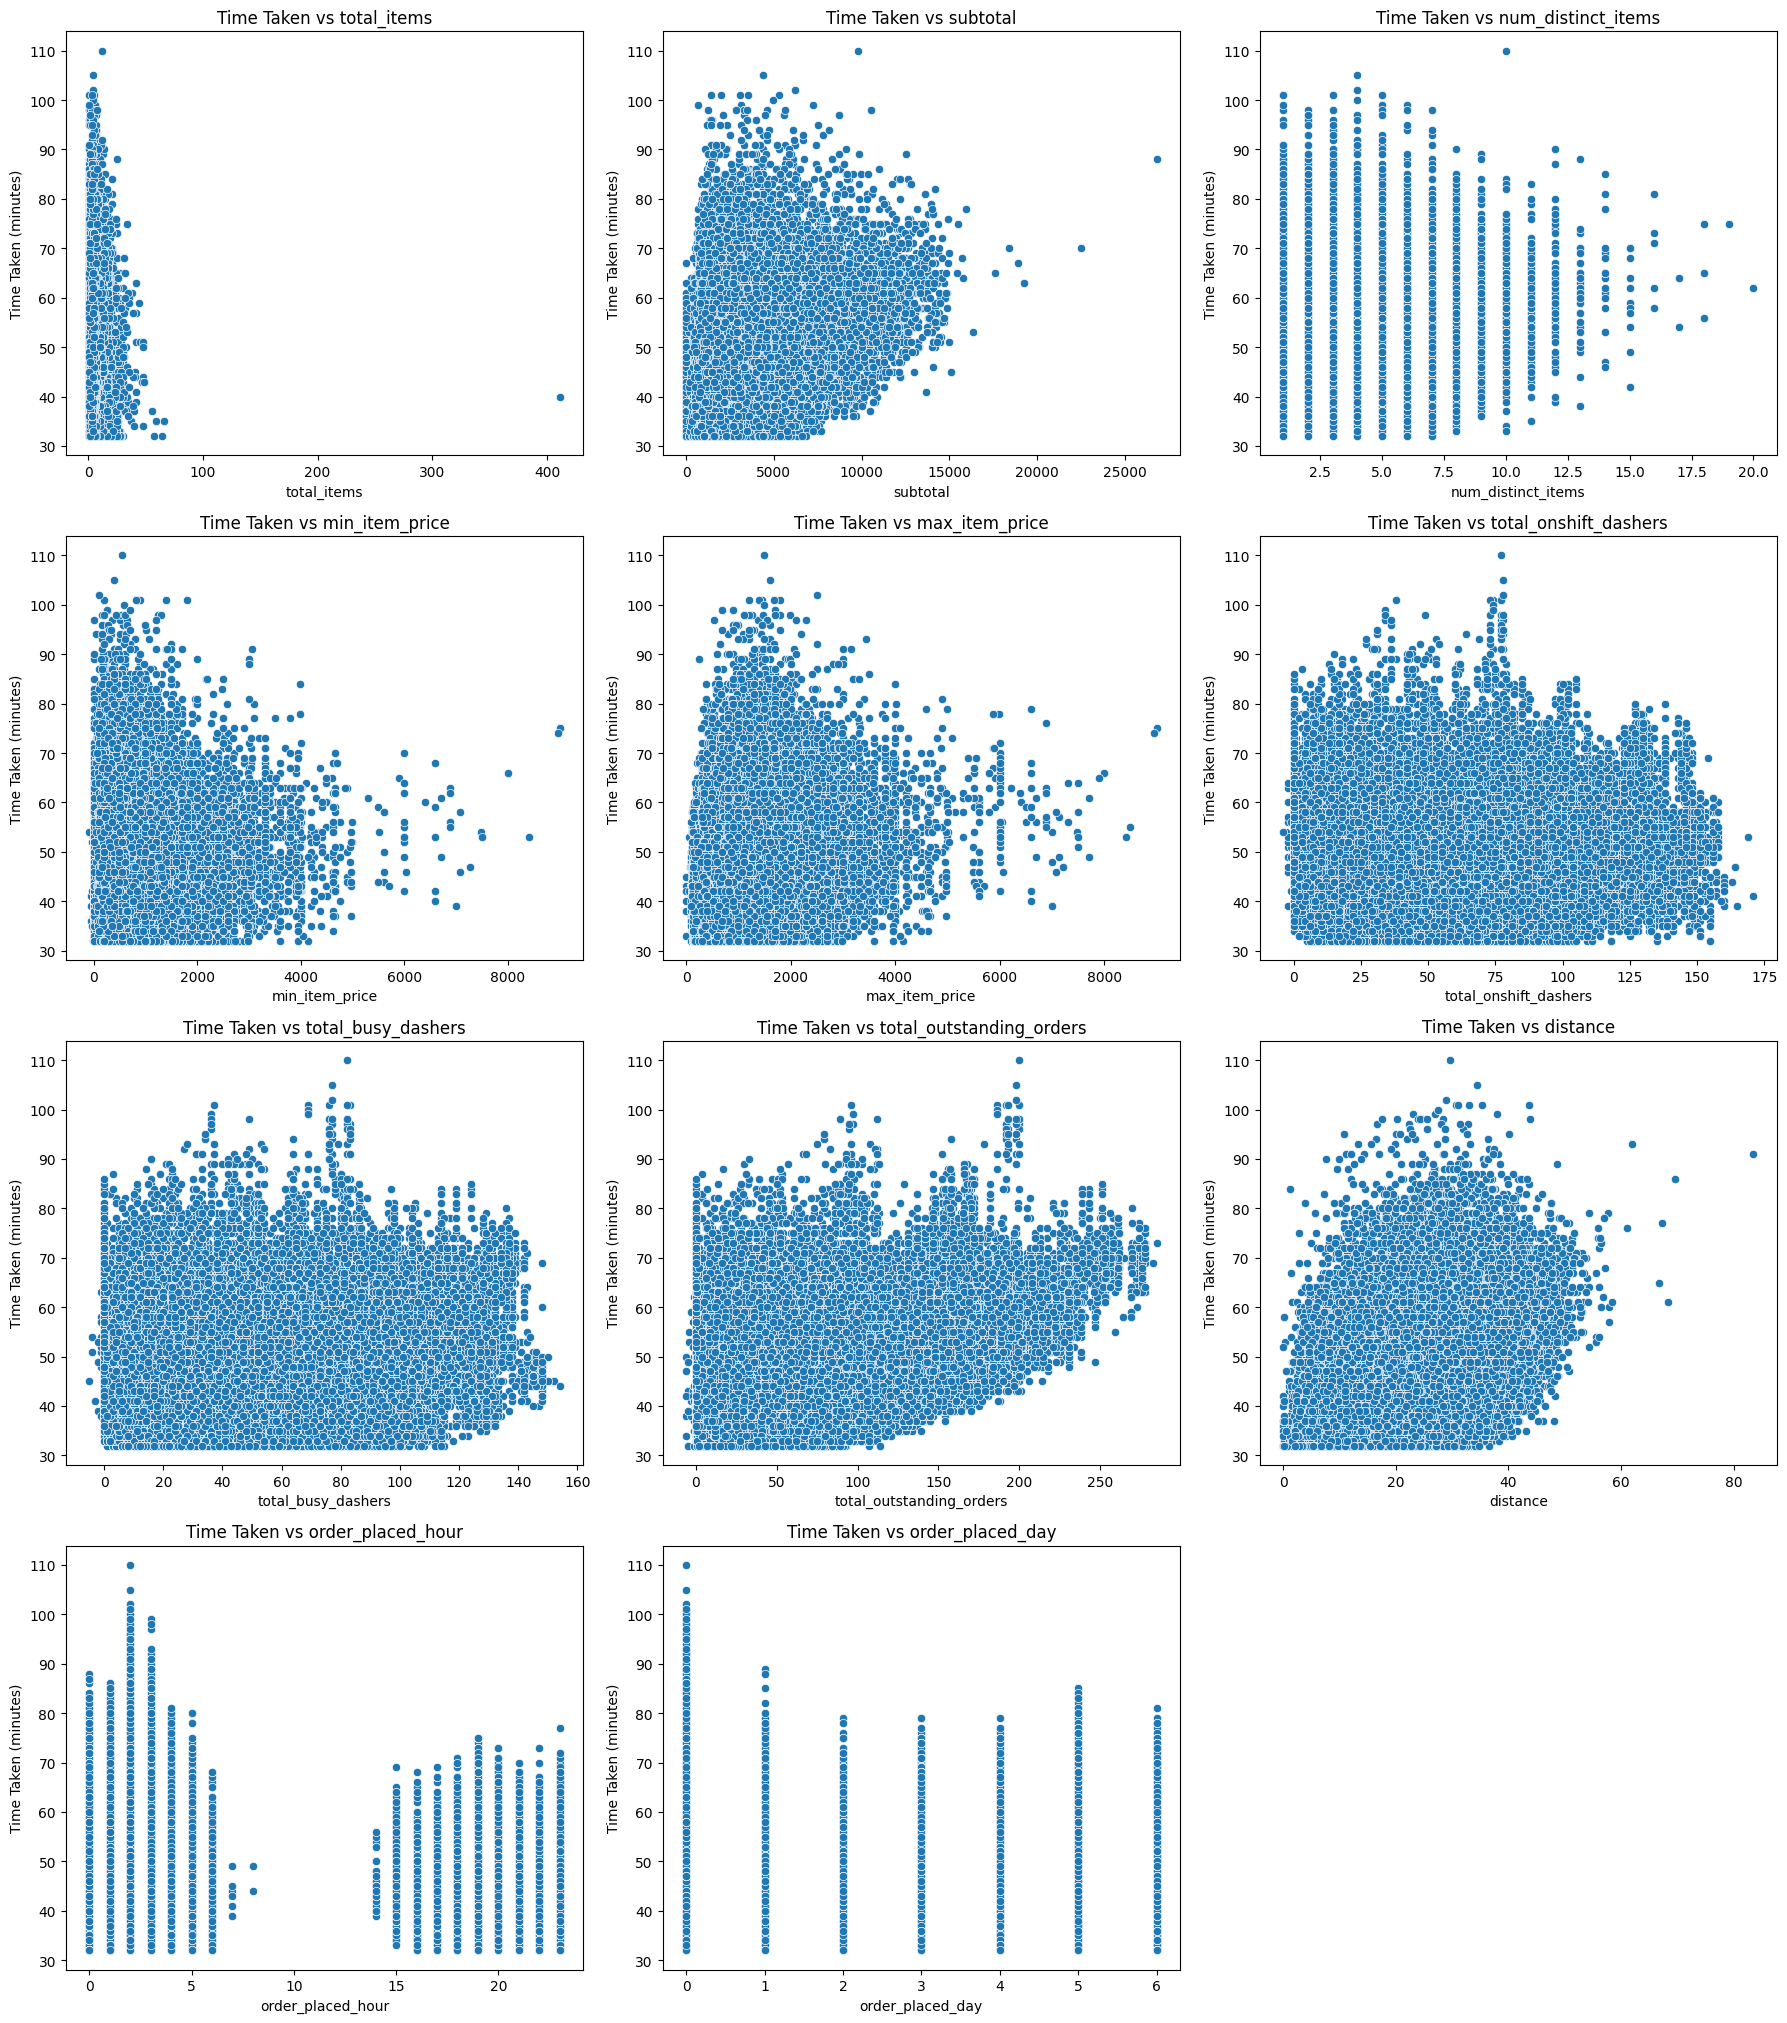

In [40]:
# Scatter plot to visualise the relationship between time_taken and other features

n_rows = math.ceil(len(numerical_cols) / 2)
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()
for idx, feature in enumerate(numerical_cols):
    sns.scatterplot(x=X_train[feature], y=y_train, ax=axes[idx])
    axes[idx].set_title(f'Time Taken vs {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Time Taken (minutes)')

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

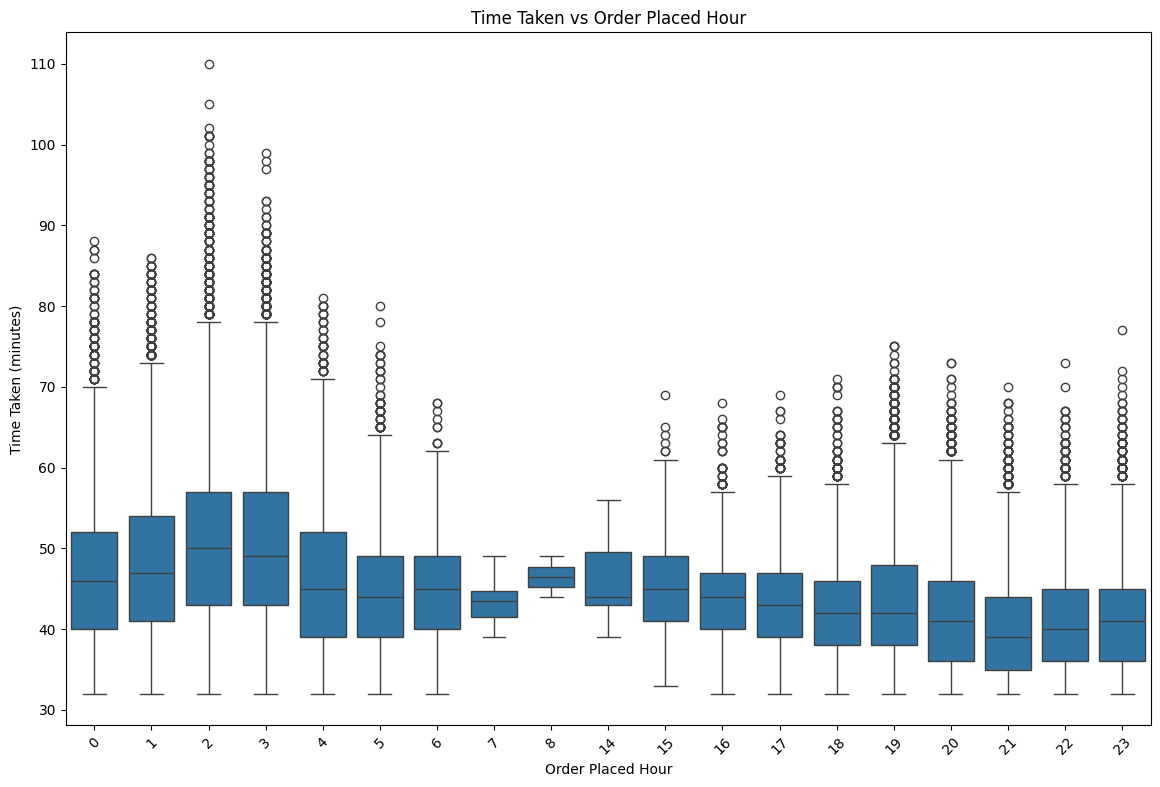

In [41]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14,9))
sns.boxplot(x=X_train['order_placed_hour'], y=y_train)
plt.title('Time Taken vs Order Placed Hour')
plt.xlabel('Order Placed Hour')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

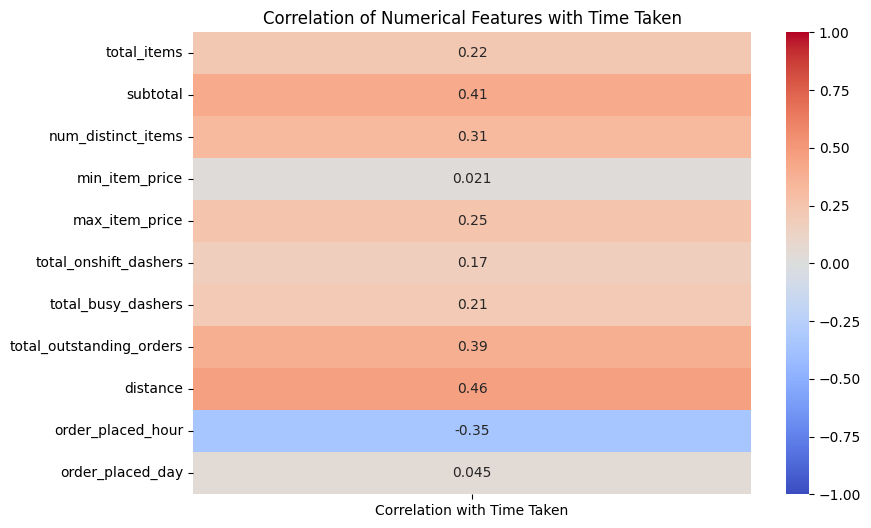

In [44]:
# Plot the heatmap of the correlation matrix only for Time Taken

# correlation with target only for numerical columns
correlations = X_train[numerical_cols].corrwith(y_train)
corr_matrix = correlations.to_frame(name='Correlation with Time Taken')

plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Numerical Features with Time Taken')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [46]:
abs_correlations = correlations.abs() 
threshold = 0.15

weak_features = abs_correlations[abs_correlations < threshold].index.tolist()
print("Weakly correlated features:", weak_features)

Weakly correlated features: ['min_item_price', 'order_placed_day']


In [47]:
# Drop 3-5 weakly correlated columns from training dataset

X_train.drop(columns=weak_features, inplace=True)
X_test.drop(columns=weak_features, inplace=True)

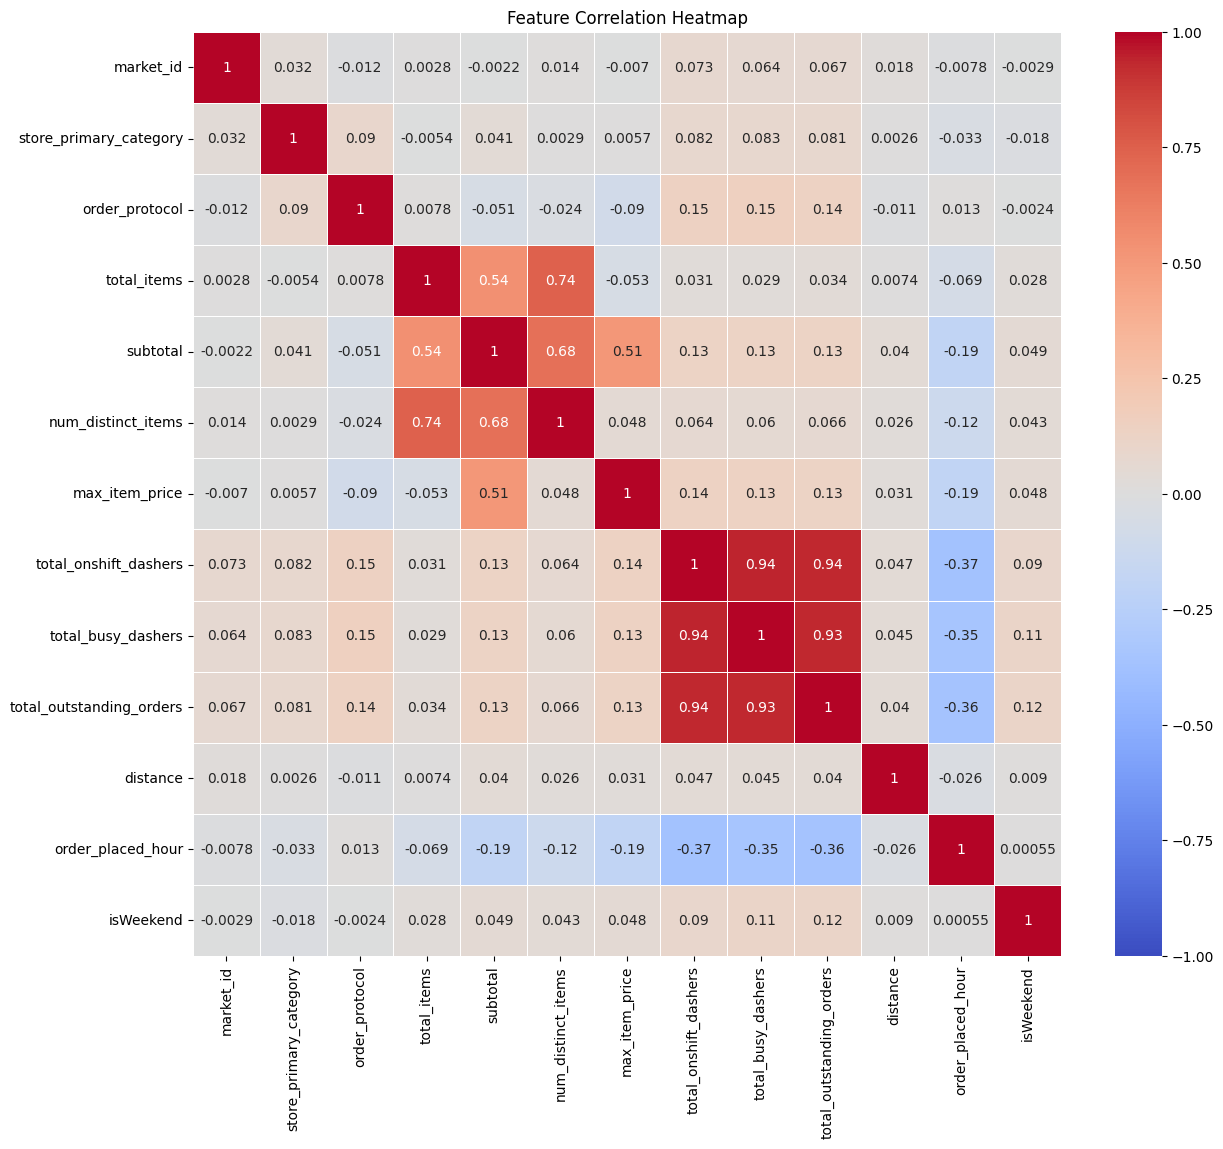

                    feature        VIF
0               total_items   5.644978
1                  subtotal  10.045084
2        num_distinct_items  10.719989
3            max_item_price   7.178249
4     total_onshift_dashers  31.451353
5        total_busy_dashers  29.814271
6  total_outstanding_orders  21.791276
7                  distance   5.198497
8         order_placed_hour   1.881731


In [48]:
# Detect Multicollinearity !! Just for investigation - Will not handle multicollinearity!!

# Method 1: Visually check high correlations (> 0.8) from heatmap
plt.figure(figsize=(14,12))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Calculate VIF for each feature
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.select_dtypes(include=[np.number]).columns
vif_data['VIF'] = [variance_inflation_factor(X_train.select_dtypes(include=[np.number]).values, i)
                   for i in range(len(X_train.select_dtypes(include=[np.number]).columns))]

print(vif_data)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

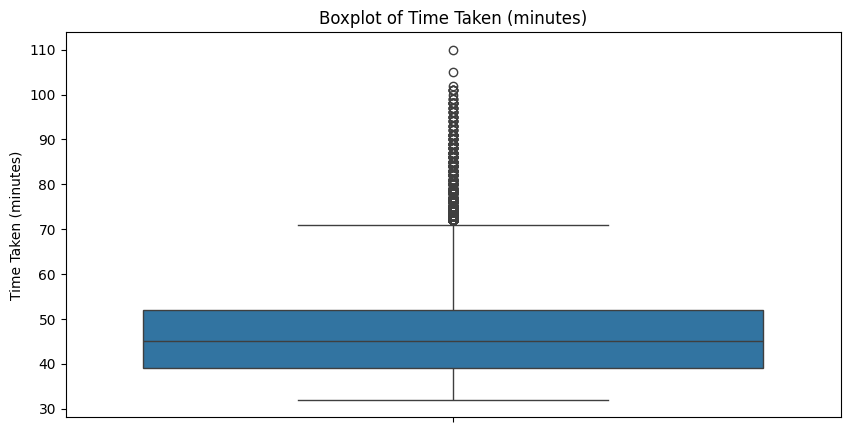

In [51]:
# Boxplot for time_taken

plt.figure(figsize=(10,5))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken (minutes)')
plt.ylabel('Time Taken (minutes)')
plt.show()


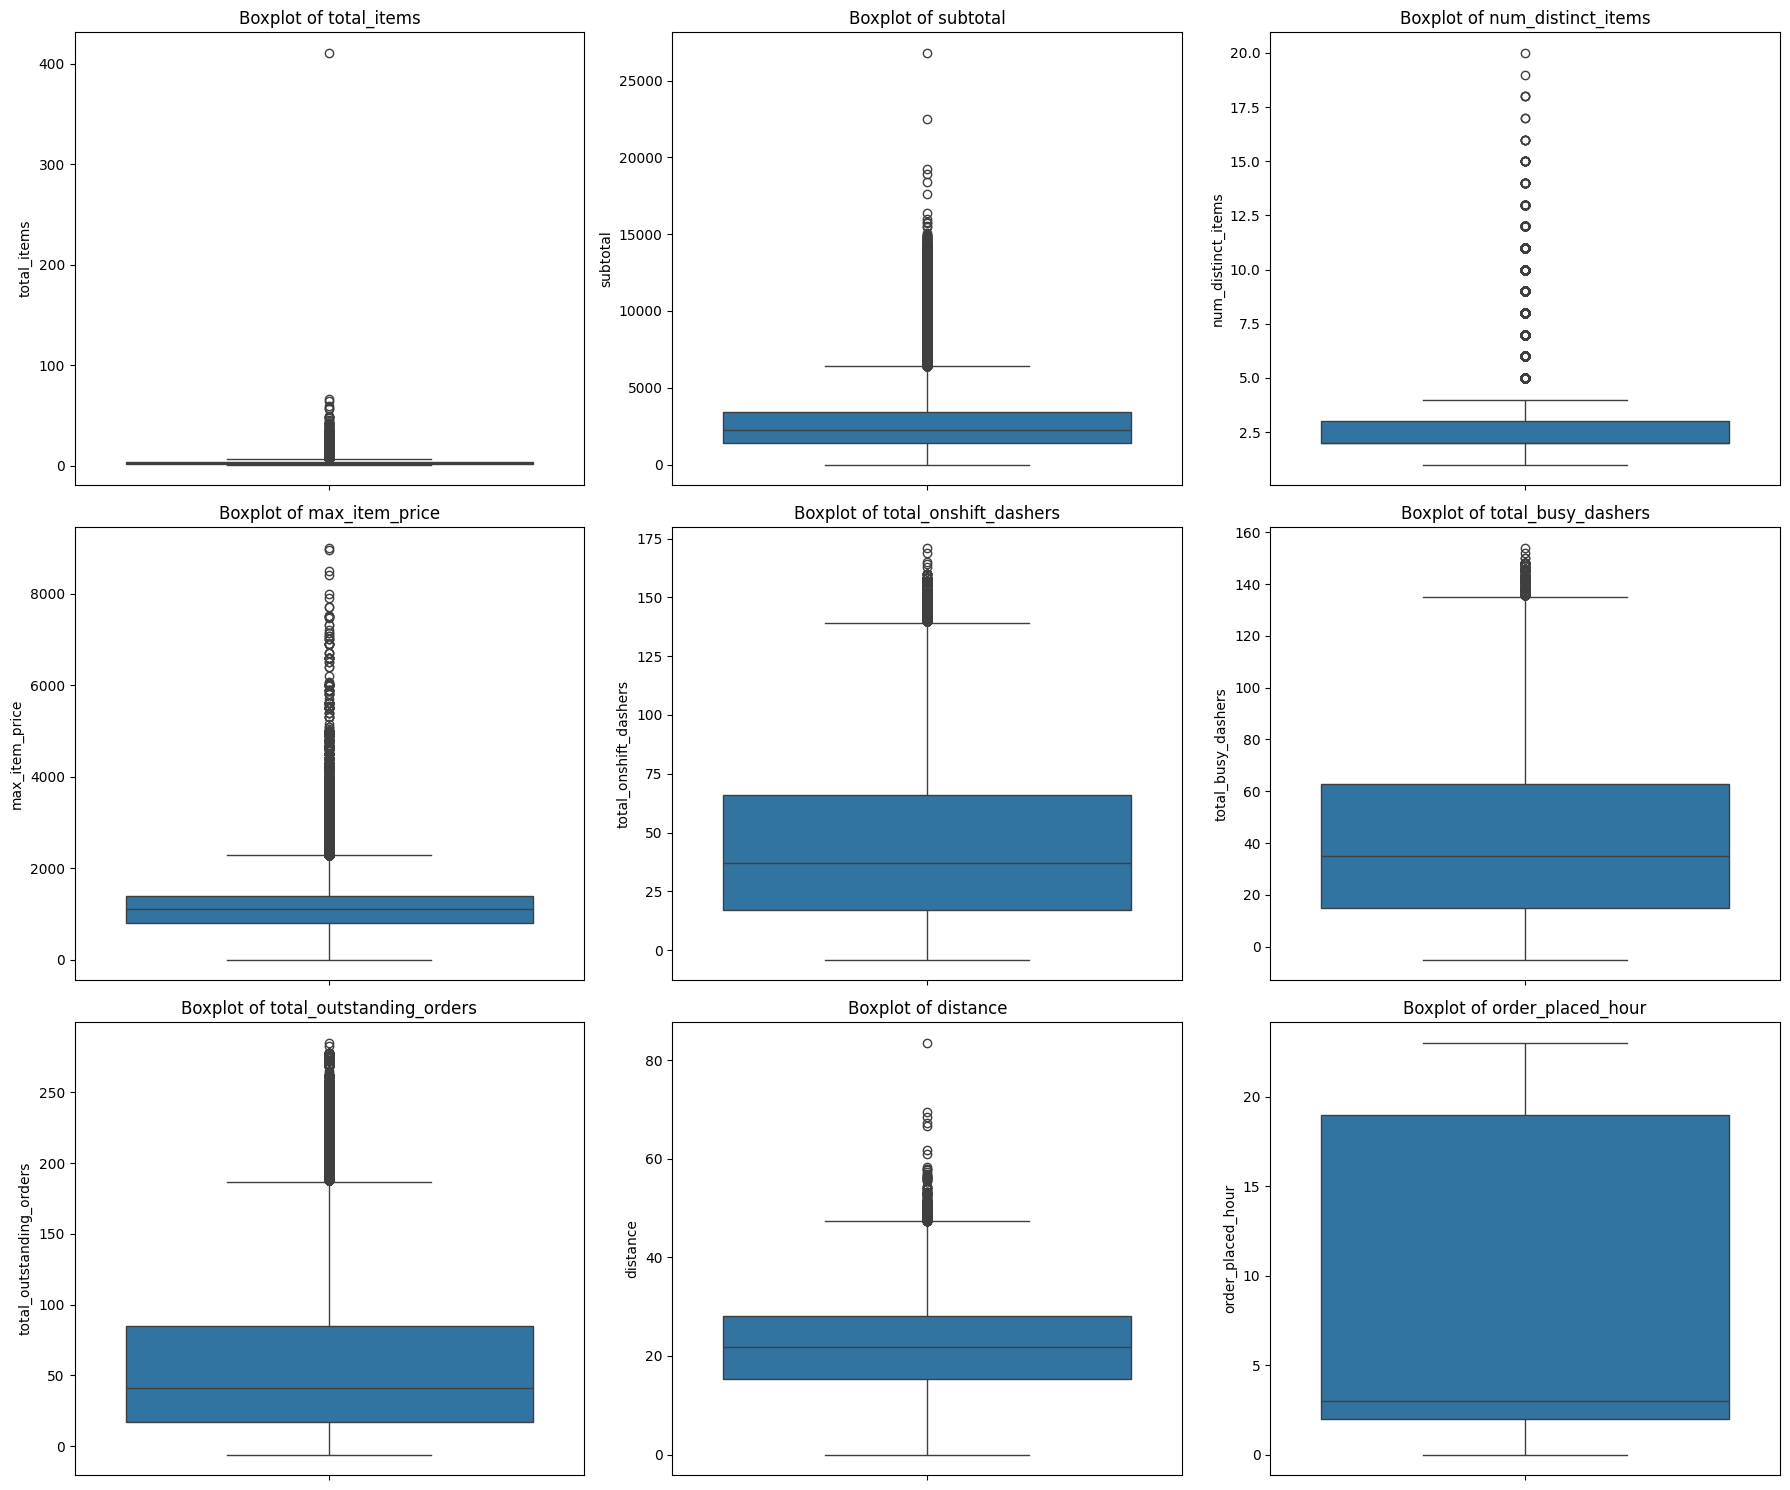

In [52]:
# Refresh numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()
for idx, feature in enumerate(numerical_cols):
    sns.boxplot(y=X_train[feature], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_ylabel(feature)
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [54]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only the rows within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
    
# Combine X_train and y_train for safe outlier removal
train_data = X_train.copy()
train_data['time_taken_minutes'] = y_train

# List of all columns where we want to remove outliers
numerical_cols_updated = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove outliers from ALL numerical features
train_data = remove_outliers_iqr(train_data, numerical_cols_updated)

# Separate again
X_train = train_data.drop('time_taken_minutes', axis=1)
y_train = train_data['time_taken_minutes']


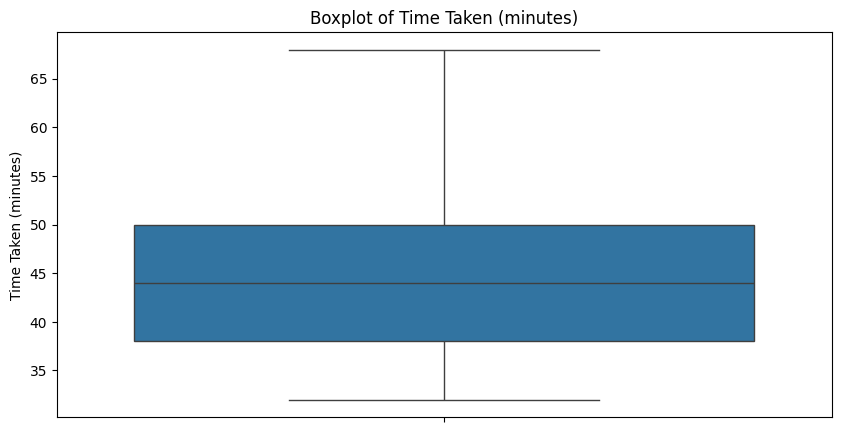

In [55]:
# Boxplot for time_taken

plt.figure(figsize=(10,5))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken (minutes)')
plt.ylabel('Time Taken (minutes)')
plt.show()

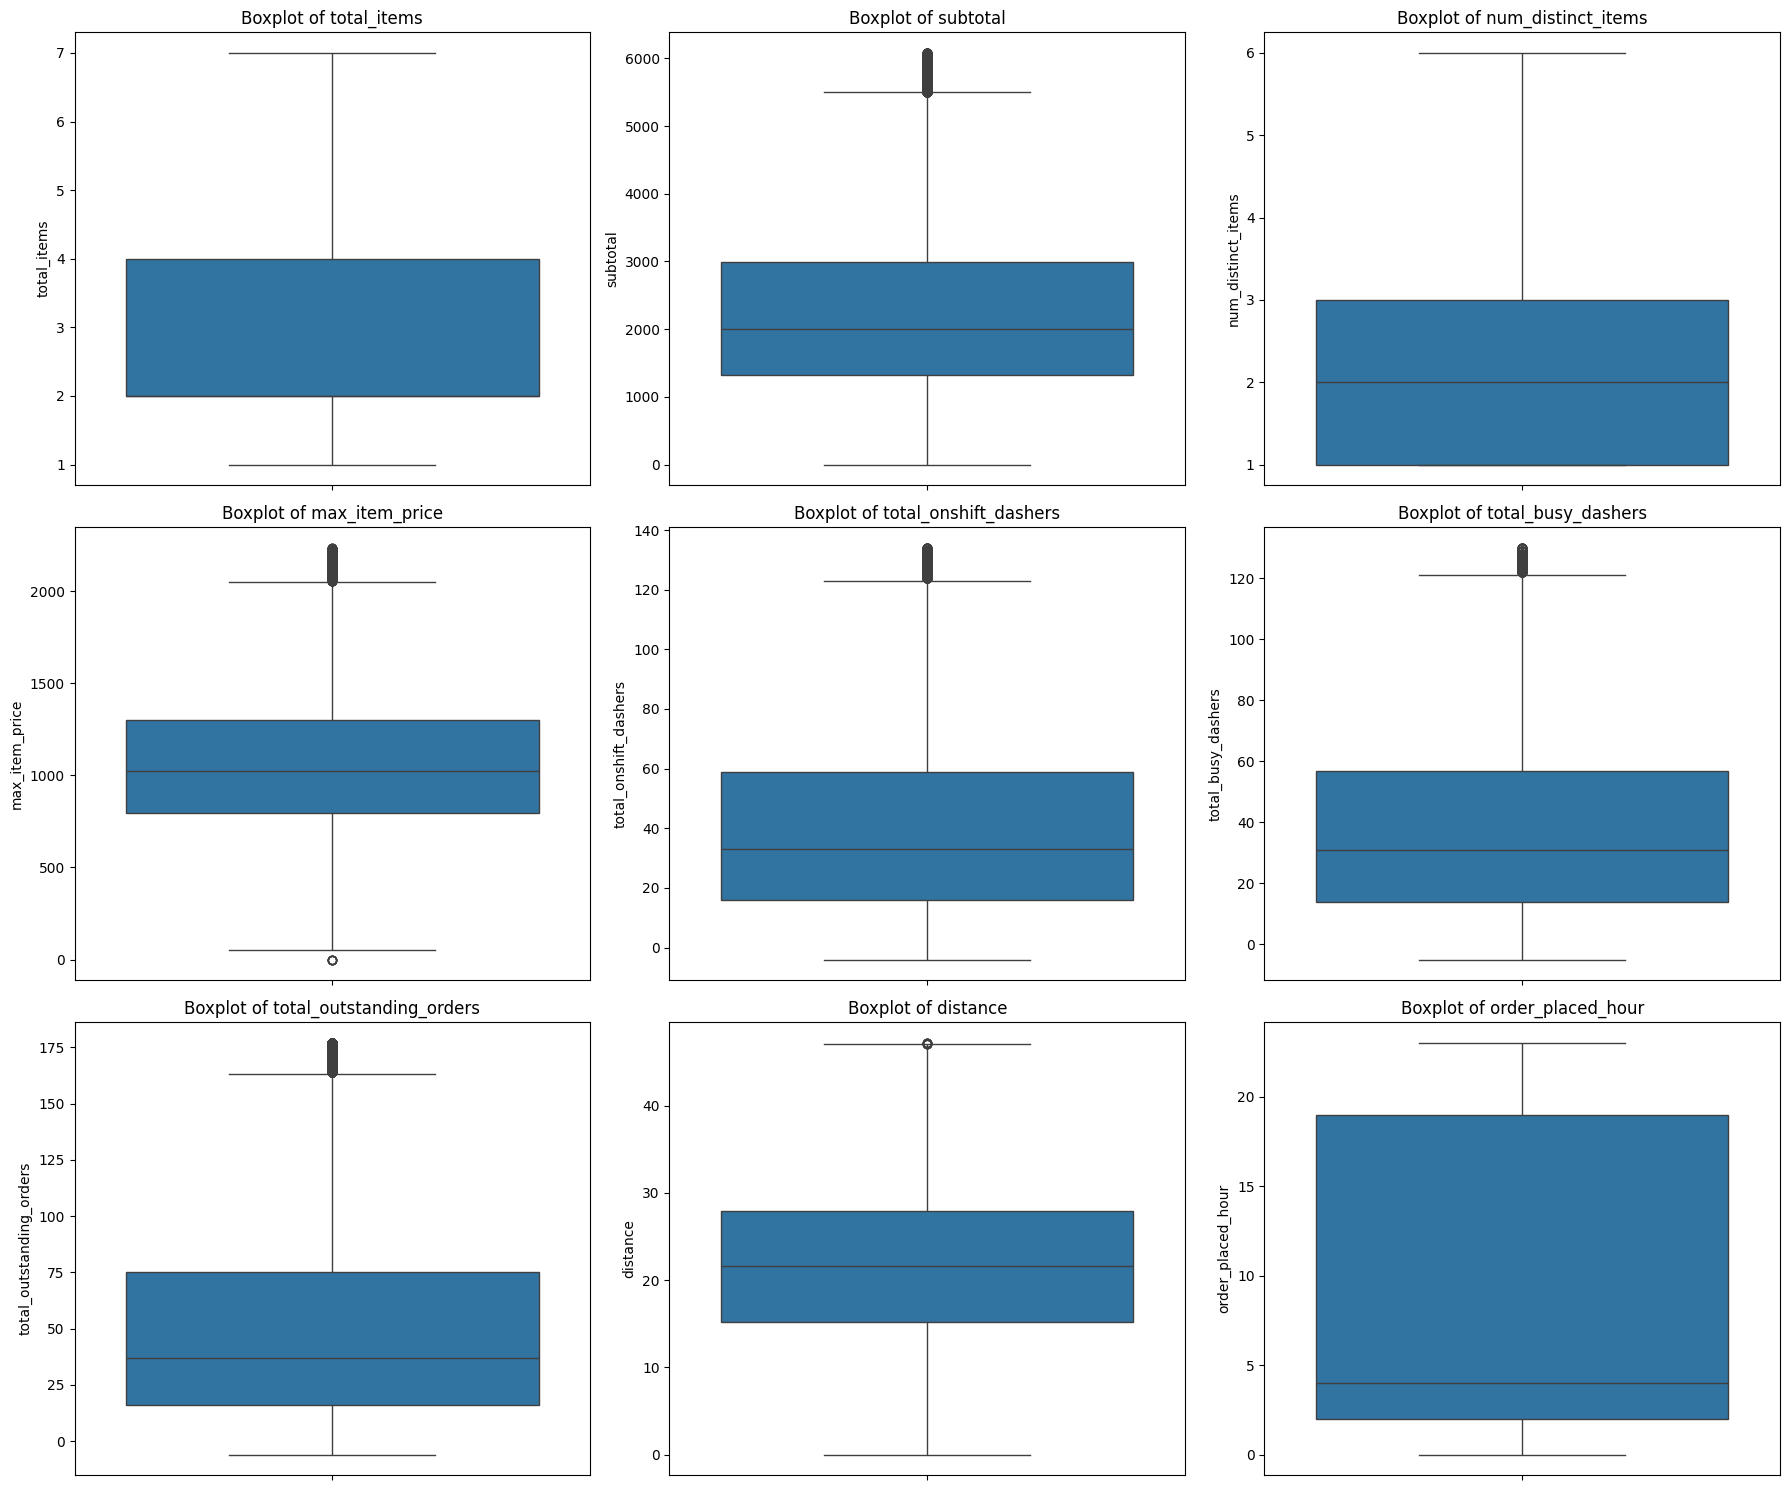

In [56]:
# Refresh numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()
for idx, feature in enumerate(numerical_cols):
    sns.boxplot(y=X_train[feature], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_ylabel(feature)
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [58]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns in test set:", numerical_cols_test)
print("Categorical columns in test set:", categorical_cols_test)


Numerical columns in test set: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_placed_hour']
Categorical columns in test set: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

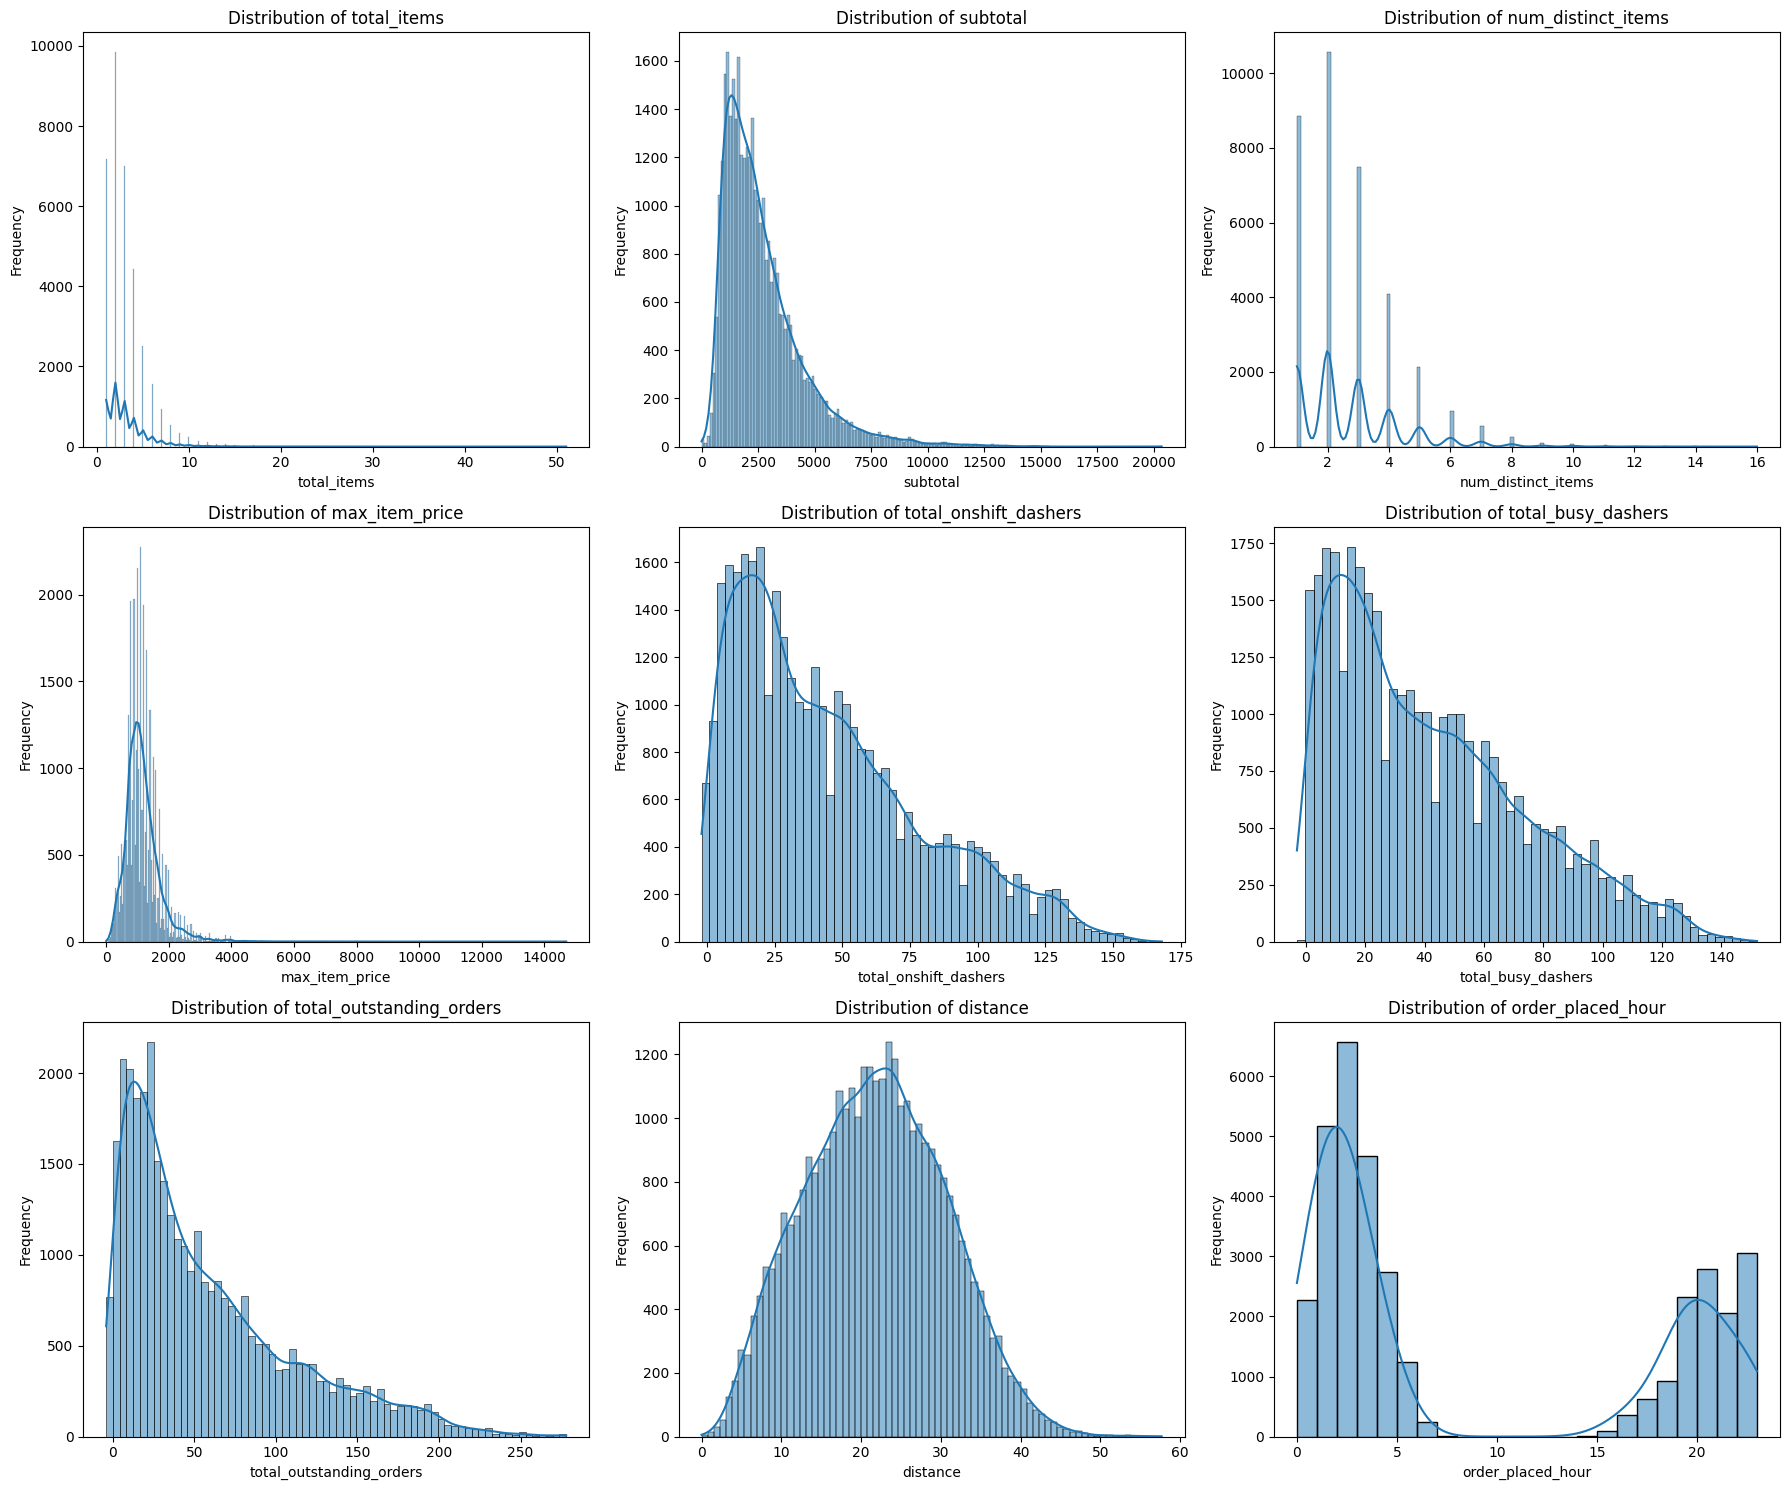

In [61]:
# Plot distributions for all numerical columns
n_cols = 3
n_rows = math.ceil(len(numerical_cols_test) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

axes = axes.flatten()

for idx, col in enumerate(numerical_cols_test):
    sns.histplot(X_test[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots if any
for idx in range(len(numerical_cols_test), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

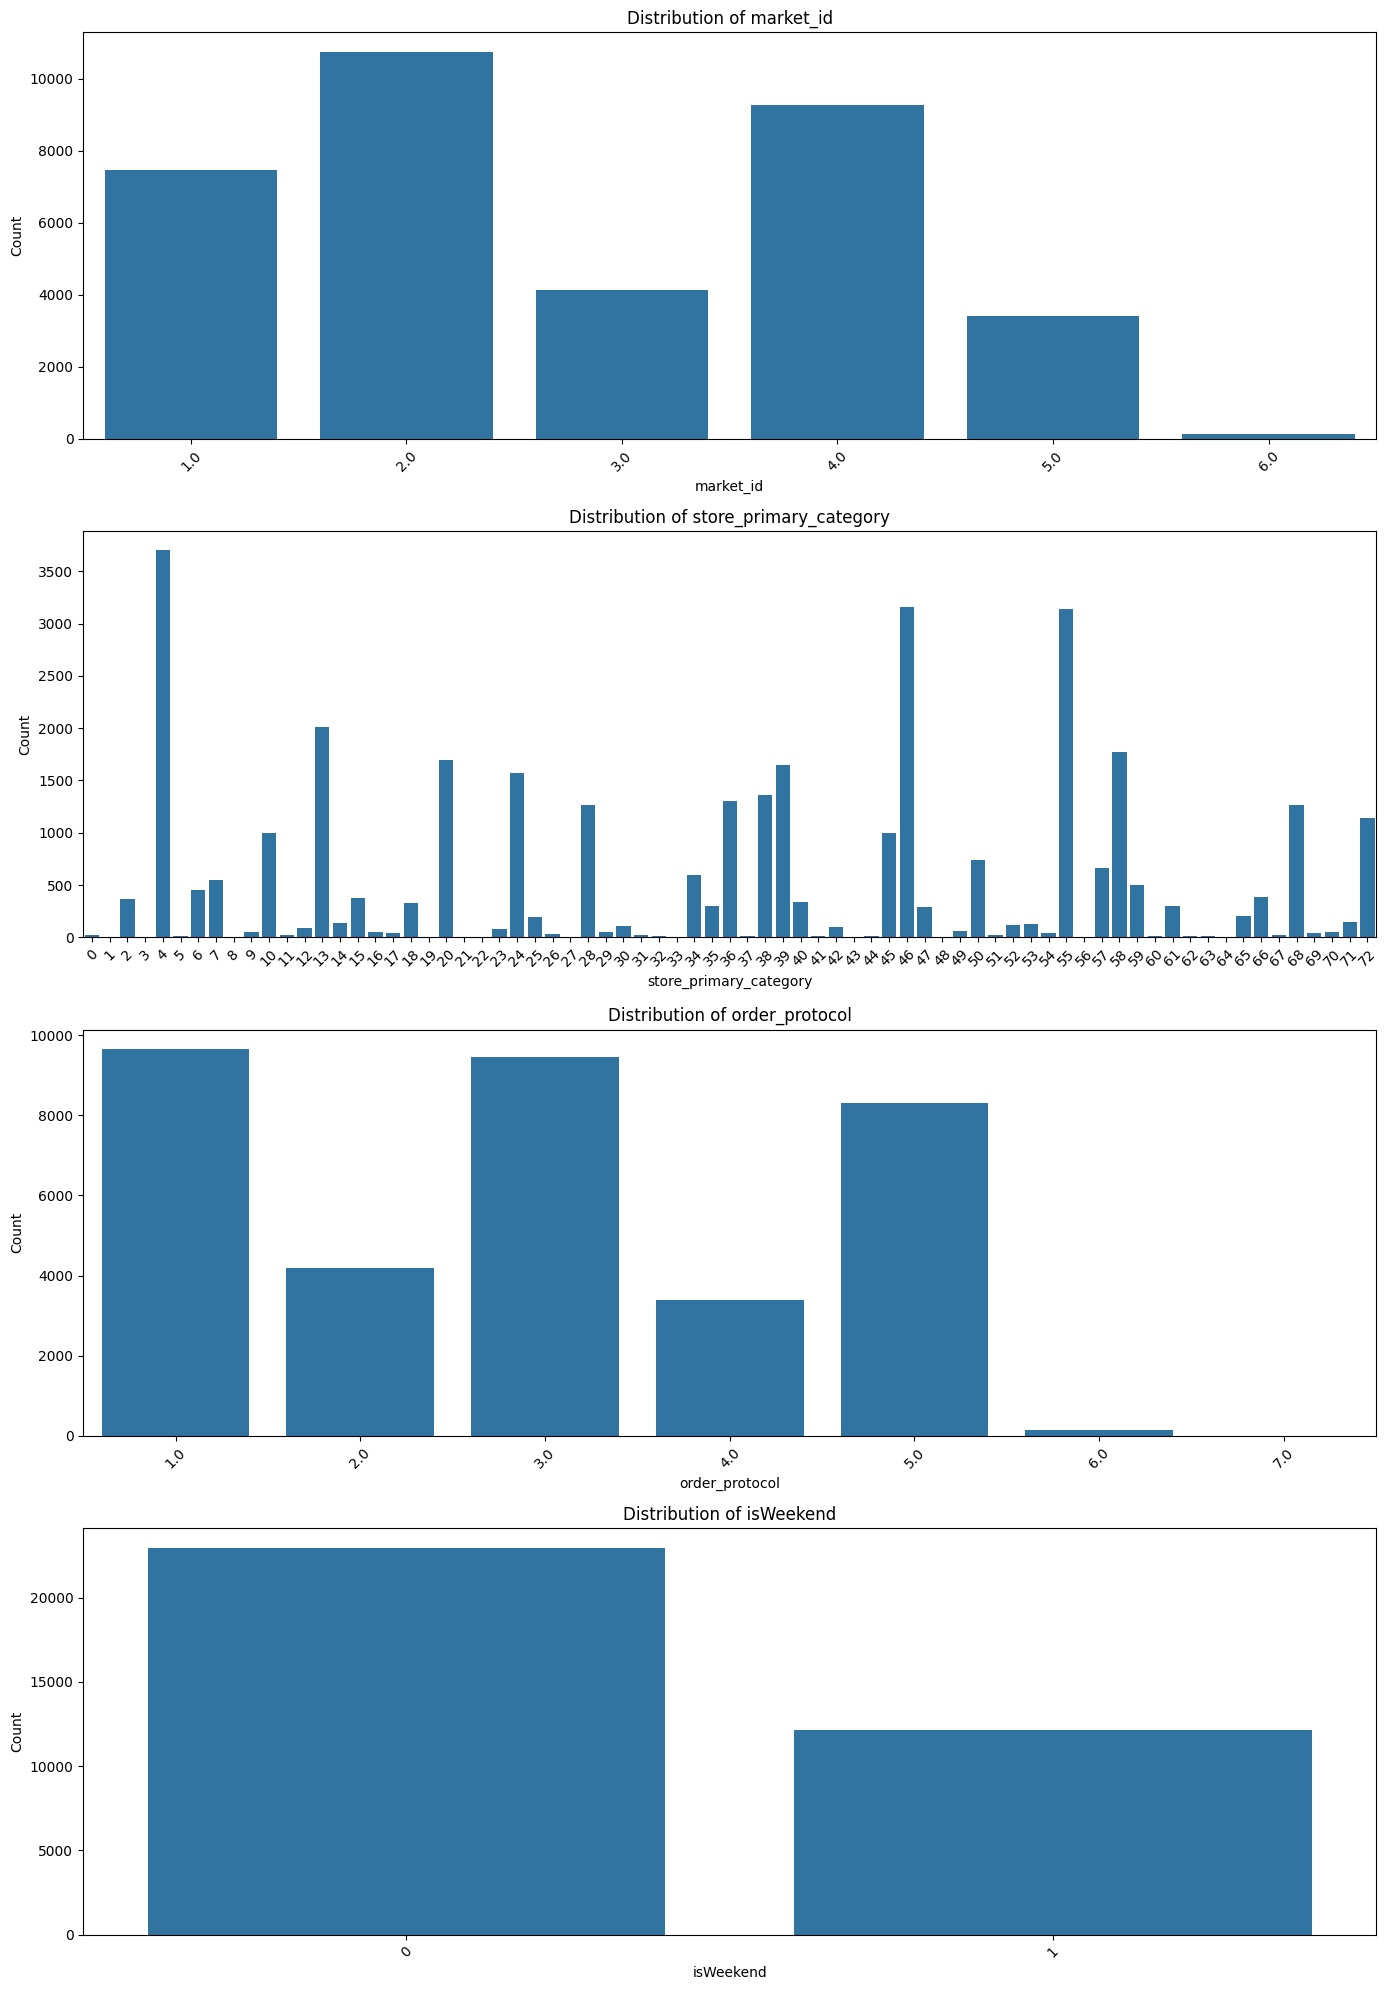

In [63]:
# Distribution of categorical columns

n_cols_cat = 1
n_rows_cat = math.ceil(len(categorical_cols_test) / n_cols_cat)

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(14, 5 * n_rows_cat))

axes = axes.flatten()

for idx, col in enumerate(categorical_cols_test):
    sns.countplot(x=X_test[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide extra subplots if any
for idx in range(len(categorical_cols_test), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

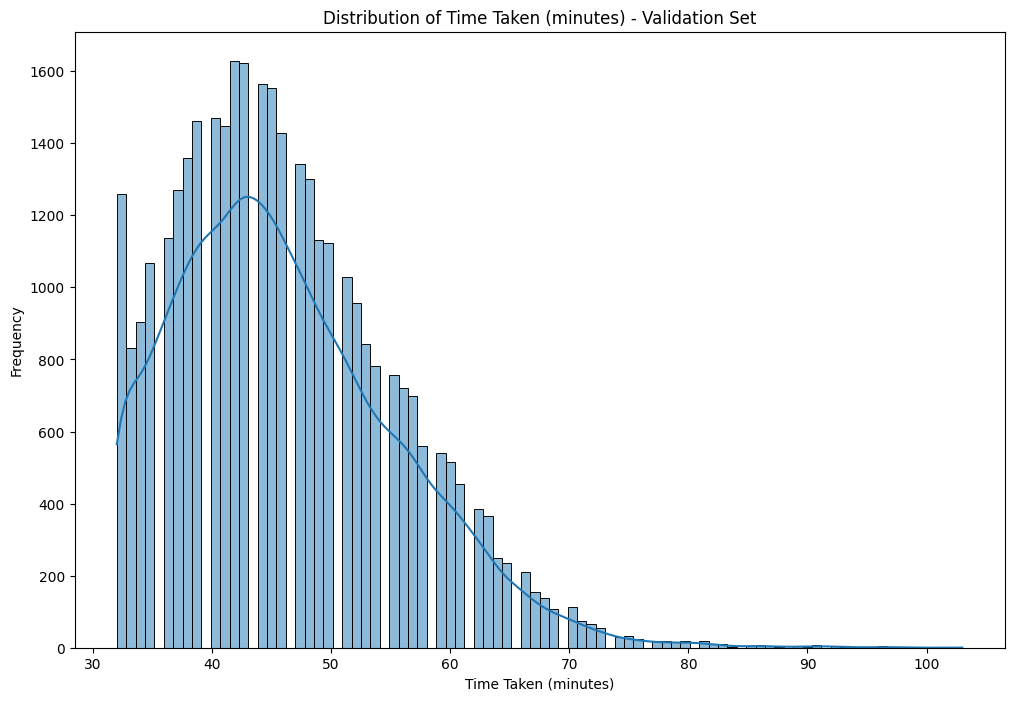

In [65]:
# Distribution of time_taken

plt.figure(figsize=(12,8))
sns.histplot(y_test, kde=True)
plt.title('Distribution of Time Taken (minutes) - Validation Set')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

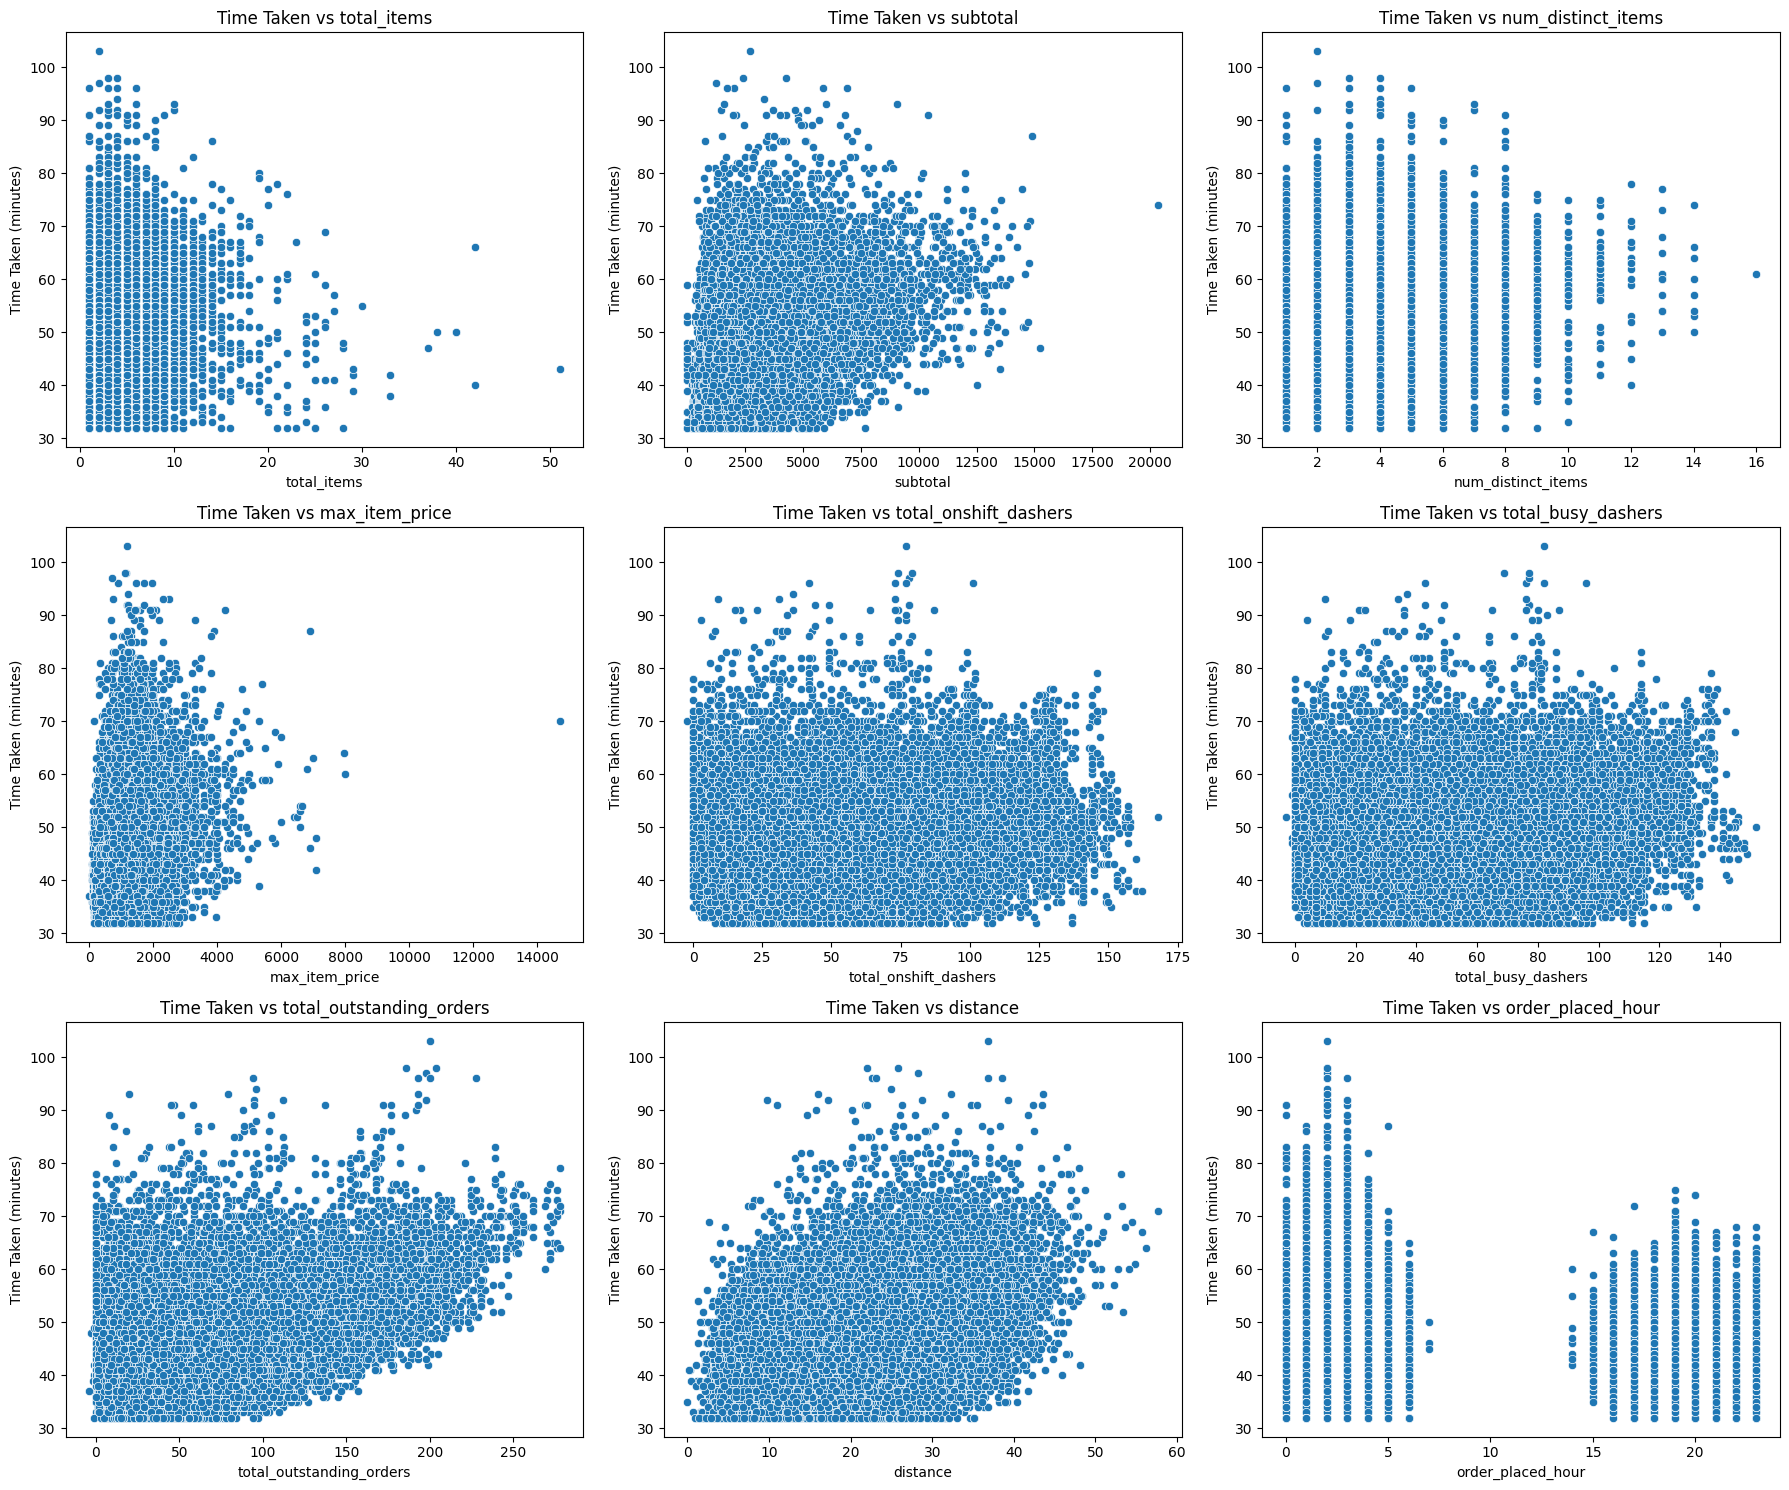

In [67]:
# Scatter plot to visualise the relationship between time_taken and other features

n_cols = 3
n_rows = math.ceil(len(numerical_cols_test) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

axes = axes.flatten()

for idx, feature in enumerate(numerical_cols_test):
    sns.scatterplot(x=X_test[feature], y=y_test, ax=axes[idx])
    axes[idx].set_title(f'Time Taken vs {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Time Taken (minutes)')

# Hide any extra empty plots
for idx in range(len(numerical_cols_test), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [69]:
# Drop the weakly correlated columns from training dataset

# Calculate absolute correlation of each feature with target
correlations = X_train.corrwith(y_train).abs()

threshold = 0.15

# Find features with weak correlation
weak_features = correlations[correlations < threshold].index.tolist()
print("Weakly correlated features to drop:", weak_features)

Weakly correlated features to drop: ['market_id', 'store_primary_category', 'total_onshift_dashers', 'total_busy_dashers', 'isWeekend']


In [70]:
X_train.drop(columns=weak_features, inplace=True)
X_test.drop(columns=weak_features, inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [73]:
# Import libraries
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [75]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Init scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# scaler - transform test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [79]:
# Init LR model
lr_model = LinearRegression()

# Train model 
lr_model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [81]:
# Find results for evaluation metrics
print("Training Set Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 Score:", r2_score(y_train, y_train_pred))

print("\nValidation Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score:", r2_score(y_test, y_test_pred))

Training Set Evaluation:
MAE: 4.5954393722265525
MSE: 34.05456466838668
RMSE: 5.835628900845793
R2 Score: 0.46945359122980423

Validation Set Evaluation:
MAE: 4.990927126823059
MSE: 43.18384564873089
RMSE: 6.571441672017708
R2 Score: 0.5066241789141651


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

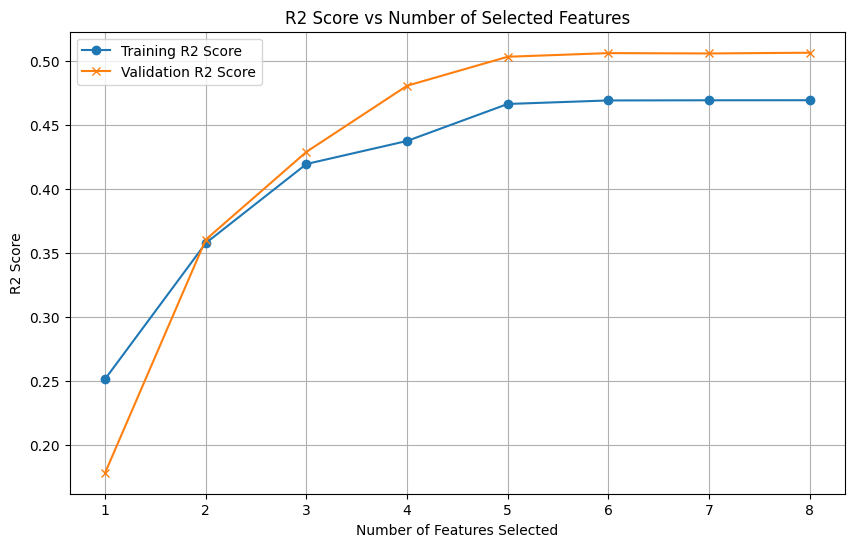

In [85]:
# Loop through the number of features and test the model


# Empty lists to store results
num_features_list = []
r2_scores_train = []
r2_scores_test = []

# Loop through number of features from 1 to total number
total_features = X_train.shape[1]

for n_features in range(1, total_features+1):
    
    # Setup model and RFE
    lr_model = LinearRegression()
    rfe = RFE(estimator=lr_model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Select features
    selected_features = X_train.columns[rfe.support_]
    
    # Subset the data
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Train model
    lr_model.fit(X_train_selected, y_train)
    
    # Predict
    y_train_pred = lr_model.predict(X_train_selected)
    y_test_pred = lr_model.predict(X_test_selected)
    
    # Evaluate
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Store results
    num_features_list.append(n_features)
    r2_scores_train.append(r2_train)
    r2_scores_test.append(r2_test)

plt.figure(figsize=(10,6))
plt.plot(num_features_list, r2_scores_train, label='Training R2 Score', marker='o')
plt.plot(num_features_list, r2_scores_test, label='Validation R2 Score', marker='x')
plt.xlabel('Number of Features Selected')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

Text(8.5, 0.4566241789141651, 'Best R2: 0.507')

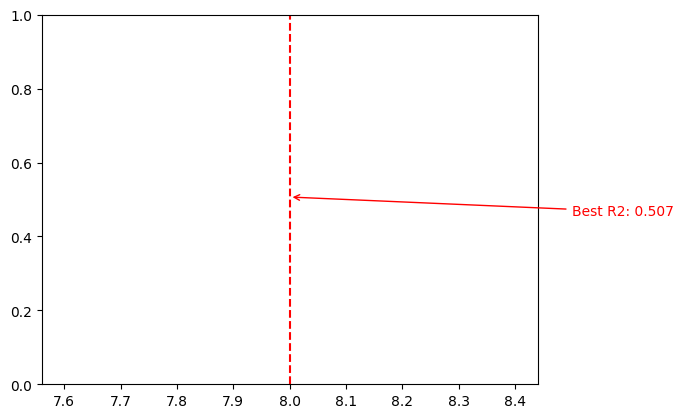

In [86]:
# Find the number of features with highest test R²
best_index = r2_scores_test.index(max(r2_scores_test))
best_num_features = num_features_list[best_index]
best_r2 = r2_scores_test[best_index]

# Plot vertical line and annotate
plt.axvline(best_num_features, color='red', linestyle='--', label=f'Best ({best_num_features} features)')
plt.annotate(f'Best R2: {best_r2:.3f}', xy=(best_num_features, best_r2),
             xytext=(best_num_features + 0.5, best_r2 - 0.05),
             arrowprops=dict(arrowstyle='->', color='red'),
             color='red')

In [87]:
# Build the final model with selected number of features

# Step 1: RFE Final Feature Selection
lr_final = LinearRegression()
rfe_final = RFE(estimator=lr_final, n_features_to_select=8)
rfe_final.fit(X_train, y_train)

final_selected_features = X_train.columns[rfe_final.support_]
print("Final Selected Features:", final_selected_features.tolist())

# Step 2: Subset Data
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

# Step 3: Train Final Model
lr_final.fit(X_train_final, y_train)

# Step 4: Predict and Evaluate
y_train_pred_final = lr_final.predict(X_train_final)
y_test_pred_final = lr_final.predict(X_test_final)

print("Final Model - Training Set Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_train_pred_final))
print("MSE:", mean_squared_error(y_train, y_train_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_final)))
print("R2 Score:", r2_score(y_train, y_train_pred_final))

print("\nFinal Model - Validation Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_test_pred_final))
print("MSE:", mean_squared_error(y_test, y_test_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_final)))
print("R2 Score:", r2_score(y_test, y_test_pred_final))

Final Selected Features: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_placed_hour']
Final Model - Training Set Evaluation:
MAE: 4.5954393722265525
MSE: 34.05456466838668
RMSE: 5.835628900845793
R2 Score: 0.46945359122980423

Final Model - Validation Set Evaluation:
MAE: 4.990927126823059
MSE: 43.18384564873089
RMSE: 6.571441672017708
R2 Score: 0.5066241789141651


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

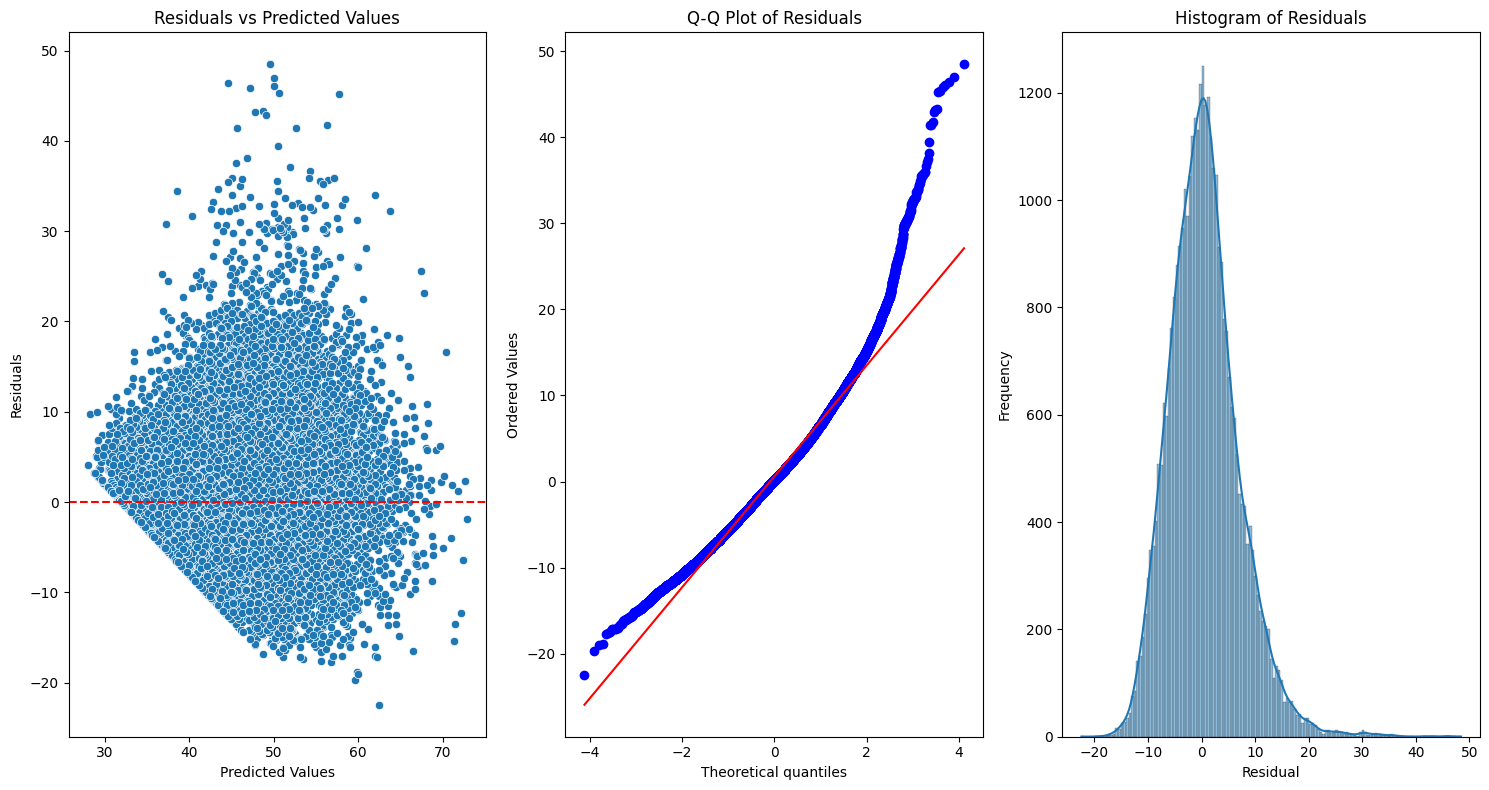

In [90]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Calculate residuals
residuals = y_test - y_test_pred_final

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# 1. Residuals vs Predicted Values
sns.scatterplot(x=y_test_pred_final, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

# 2. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# 3. Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[2])
axes[2].set_title('Histogram of Residuals')
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


[Your inferences here:]

#### **1. Residuals vs Predicted Values**

**Observation:**
- The residuals seem randomly scattered around the horizontal line at 0.
- There is **no obvious pattern or trend** (like funnel shape, curves, etc.).
- The residual spread is **wider in the middle** and a little **narrow at ends**.

**Inference:**
- Residuals are **fairly randomly distributed**, which suggests:
  - No major violation of **linearity assumption**.
  - No obvious **heteroscedasticity** (although slight spread difference is visible).
- Model seems reasonably stable.

#### **2. Q-Q Plot (Quantile-Quantile Plot)**

**Observation:**
- In the middle range, the residuals **lie close to the red reference line**.
- At the extreme ends (tails), the points **deviate from the line** (curving upward and downward).

**Inference:**
- Residuals are **approximately normally distributed** in the center.
- **Heavy tails** (at extremes) → some mild outliers or slight non-normality.
- Not perfect, but **good enough** for practical modeling — **no major concern**.

#### **3. Histogram of Residuals**

**Observation:**
- The histogram of residuals is **approximately bell-shaped**.
- It is **slightly skewed right** (positive skewness).
- No multiple peaks (no multimodal behavior).

**Inference:**
- Residuals are **reasonably symmetric** with a **slight positive skew**.
- No severe skewness or weird shape → model assumptions are largely okay.

#### **Professional Final Inference Summary**

| Aspect | Result | Interpretation |
|:---|:---|:---|
| Residuals Randomness | Mostly random | Linearity assumption is okay |
| Residuals Variance | Fairly constant | No strong heteroscedasticity |
| Normality | Approximate, slight heavy tails | Minor non-normality at extremes |
| Skewness | Slight positive skew | Acceptable, can proceed |

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [94]:
# Compare the scaled vs unscaled features used in the final model

coef_scaled = pd.Series(lr_final.coef_, index=final_selected_features)
print("Scaled Coefficients:")
print(coef_scaled)

Scaled Coefficients:
order_protocol             -0.906934
total_items                -0.141132
subtotal                    1.589544
num_distinct_items          0.694510
max_item_price              0.079266
total_outstanding_orders    1.404470
distance                    3.865894
order_placed_hour          -1.576269
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [96]:
# Calculate the standard deviation of the target variable y_train
std_y = y_train.std()

# Get the StandardScaler fitted feature names and their standard deviations
feature_std_mapping = dict(zip(scaler.feature_names_in_, scaler.scale_))

# Now create mapping only for final selected features
unscaled_coefs = {}

for feature, coef in zip(final_selected_features, lr_final.coef_):
    if feature in feature_std_mapping:
        # Adjust the coefficient for unscaled features
        unscaled_coef = coef * (std_y / feature_std_mapping[feature])
        unscaled_coefs[feature] = unscaled_coef
    else:
        print(f"Warning: {feature} not found in mapping.")

# Convert the unscaled coefficients into a Pandas Series for easy viewing
coef_unscaled = pd.Series(unscaled_coefs)
print("Unscaled Coefficients:")
print(coef_unscaled)


Unscaled Coefficients:
total_items                -0.775092
subtotal                    0.010574
num_distinct_items          4.545154
max_item_price              0.001609
total_outstanding_orders    0.260923
distance                    3.582192
order_placed_hour          -1.428642
dtype: float64


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Categorical variables in the dataset:
- `market_id`
- `store_primary_category`
- `order_protocol`

Additional categorical variables generated during feature engineering:
- `isWeekend`  (derived from the order date)

Inference about their effect on the dependent variable (`Time_taken (min)`):
- **`market_id`**: Different markets (geographic areas) may have varying traffic conditions, infrastructure quality, or regulations, which can influence delivery times.
- **`store_primary_category`**: The category of the store (e.g., grocery, restaurant, pharmacy) can impact preparation times and urgency, thereby affecting the delivery time.
- **`order_protocol`**: Different ordering protocols (e.g., scheduled orders, instant orders) affect how quickly an order is dispatched and delivered.
- **`isWeekend`**: Deliveries during weekends often encounter different traffic patterns (either lighter or heavier) compared to weekdays, impacting the delivery time.

Summary:
- Yes, there are categorical variables.
- They have a meaningful impact on delivery time.
- Proper encoding and interpretation of these variables are important for building an accurate predictive model.



---


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

`test_size = 0.2` means that **20% of the total dataset** is used as the **test set**, and the remaining **80%** is used as the **training set**.  

This split helps evaluate the model’s performance on unseen data.


---


##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Feature with the **highest positive correlation** with `Time_taken (min)` is **`Distance`**.

- **Distance** refers total distance from the restaurant to customer
- Positive **CORRELATION** : the **greater the distance**, the **more time** it takes to complete the delivery.

![](metadata\heatmap.png)


---


##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

1. Used boxplots to detect outliers visually for numerical features.

2. Outliers were addressed by removing extreme values based on **IQR (Interquartile Range)** method.


![](metadata\outliers.png)


---


##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

The top 3 features significantly affecting `Time_taken (min)` are:
1. **distance** refers total distance from the restaurant to customer:
   - Directly impacts delivery time — larger distances require more time for the delivery.
   - time_taken vs distance CORR. – 0.46
2. **subtotal**  refers to total price of an order:
   - Larger order values likely involve more items or preparation time.
   - time_taken vs distance CORR. – 0.41
3. **total_outstanding_orders** refers to total number of outstanding orders at time of placement of current order:
   - A backlog of pending orders slows down fulfillment and delivery.
   - time_taken vs distance CORR. – 0.39


![](metadata\heatmap.png)


---


#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>

Linear Regression is a **supervised learning** algorithm used for **predicting a continuous dependent variable** based on one or more independent variables.  

It finds the **best-fitting straight line** (in simple regression) or a hyperplane (in multiple regression) through the data points by minimizing the difference between actual and predicted values.

The general formula:      
![](metadata\LR.png) 

Where:
- y = dependent variable (target)
- β0 = intercept
- β1, β2 , …, βn = coefficients (slopes for each feature)
- x1, x2, …, xn = independent variables (features)
- ϵ = error term (residual)

The model tries to **minimize the cost function (usually MSE)** to find the best \(\beta\) values.


---


##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

| Aspect | Simple Linear Regression | Multiple Linear Regression |
|:---|:---|:---|
| **Definition** | A model that captures the relationship between **one independent variable** and **one dependent variable**. | A model that captures the relationship between **two or more independent variables** and **one dependent variable**. |
| **Equation** | y = β0 + β1 x + ϵ | y = β0 + β1 x1 + β2 x2 + β2 x2 + ... + βn xn + ϵ |
| **Visualization** | Results in a **straight line** when plotted in 2D space. | Forms a **hyperplane** when plotted in multi-dimensional space (not easily visualized beyond 3D). |
| **Complexity** | **Simple** to interpret, easy to implement. | **More complex**, requires estimating multiple coefficients. |
| **Use case example** | Predicting delivery time based only on delivery distance. | Predicting delivery time based on delivery distance, road traffic density, type of vehicle, and weather conditions. |
| **Risk of overfitting** | Generally low because fewer parameters are estimated. | Higher if many features are included without proper feature selection or regularization. |

Summary:

- **Simple Linear Regression** handles a **single** feature to predict the target.
- **Multiple Linear Regression** uses **multiple** features for prediction.
- Both assume a **linear relationship** between inputs and output.
- Multiple features allow the model to capture **more real-world complexity**, but also require **careful handling** to avoid overfitting or multicollinearity.


---


##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>

The **cost function** measures how well the model’s predictions match the actual target values.  

In linear regression, the most common cost function is **Mean Squared Error (MSE)**:

![](metadata\MSE.png) 

where, 
𝑦𝑖 = the actual value and 
𝑦^𝑖 = the predicted value.

**Minimization**:
- The model **adjusts the coefficients** (slopes and intercept) to **minimize the MSE**.
- Optimization techniques like **Gradient Descent** or **analytical methods** (Normal Equation) are used to find the best parameters that minimize the cost.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

- **Overfitting** happens when a model learns the **training data too well**, including noise and outliers, causing it to perform poorly on new, unseen data.  (High accuracy on training data but low accuracy on test data.)

- **Underfitting** happens when a model is **too simple** to capture the underlying pattern of the data, leading to poor performance on both training and test data.  (Low accuracy everywhere.)

Summary:
- Overfitting = **Too complex** model.
- Underfitting = **Too simple** model.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

A **residual plot** shows the difference between actual and predicted values (residuals) on the y-axis and the predicted values or independent variable on the x-axis.

![](metadata\RESIDUAL.png)

**Usage in diagnosing:**
- If the residuals are **randomly scattered** around zero, it suggests that the model fits the data well (linear relationship assumed correctly).
- If there is a **pattern** (like curves or clusters), it indicates that the model is **missing some pattern** (maybe the relationship is not truly linear).
- **Heteroscedasticity** (residuals spread increases with predicted values) can also be spotted, signaling that model assumptions are violated.

Thus, residual plots help detect **non-linearity, outliers, and unequal error variance**.